In [ ]:
import pyfastx
import numpy as np
import matplotlib.pyplot as plt
import phanotate_modules.functions as phano
fa_ds = pyfastx.Fasta('ds-linear.fasta')
fa_ss = pyfastx.Fasta('ss-circular.fasta')
dataset=[]



In [ ]:
for itm in fa_ds:
    list_itm=[]
    list_itm.append(len(itm.seq))
    list_itm.append(itm.gc_skew)
    list_itm.append(itm.gc_content)
    brbs=phano.get_backgroud_rbs(itm.seq)
    list_itm=list_itm+brbs
    list_itm.append("ds")
    dataset.append(list_itm)

for itm in fa_ss:
    list_itm=[]
    list_itm.append(len(itm.seq))
    list_itm.append(itm.gc_skew)
    list_itm.append(itm.gc_content)
    brbs=phano.get_backgroud_rbs(itm.seq)
    list_itm=list_itm+brbs
    list_itm.append("ss")
    dataset.append(list_itm)

dataset

In [ ]:
import pyfastx
import numpy
import matplotlib.pyplot as mplt
import objgraph
import sys
import phanotate_modules.functions as phano
fa_ds = pyfastx.Fasta('ds-linear.fasta')
fa_ss = pyfastx.Fasta('ss-circular.fasta')
dataset=[]
f=open('dna_count.txt','a')

for itm in fa_ss:
    list_itm=[]
    list_itm.append(len(itm.seq))
    list_itm.append(itm.gc_skew)
    list_itm.append(itm.gc_content)
    brbs=phano.get_backgroud_rbs(itm.seq)
    list_itm=list_itm+brbs
    list_itm.append("ss")
    for item in list_itm:
        f.write(str(item)+"\t")
    f.write("\n")
    del list_itm
    del brbs
    objgraph.show_growth()

In [ ]:
fa_ds

In [ ]:
import numpy as np
import re
import pandas as pd
import tensorflow.compat.v1 as tf
from matplotlib import pyplot as plt
path = 'dna_count.txt'
fr = open(path)
lines = fr.readlines()
dataset = []
for line in lines:
    line=line.replace("nan","NaN")
    line = line.strip()
    line = re.split(r'\t', line)
    line = [i if i=="ds" or i=="ss"  else float(i) for i in line]
    dataset.append(line)
dataset = [line[0:32] for line in dataset]
rbs_names=[]
for i in range(28):
    rbs_names.append("RBS"+str(i+1))
dna_header=["length","skew","gc_content"]
dna_header=dna_header+rbs_names+["type"]
cols_used = dna_header[3:29]
dataset_array=np.array(dataset)
dataset_pd = pd.DataFrame(dataset_array, columns=dna_header)
dataset_pd = dataset_pd.dropna(how='all')
dna_data = dataset_pd.get(cols_used)
labels=dataset_pd.get("type")
labels = [0 if i == "ds" else 1 for i in labels]
labels=np.array(labels)
dna_data=np.array(dna_data,dtype=np.float32)
dna_data=dna_data/dna_data.max(0)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#x为数据集的feature熟悉，y为label.
# x_train, x_test, y_train, y_test = train_test_split(dna_data, labels, test_size = 0.2,random_state=4)
from sklearn import tree
X = x_train
Y = y_train
clf = tree.DecisionTreeClassifier()
clf.max_depth=3
clf = clf.fit(X, Y)
scores=cross_val_score(clf,x_test,y_test)
scores.mean()

0.8560272128126993

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=None, min_samples_split=3,random_state=0,max_features = "sqrt",bootstrap = True)
clf = clf.fit(x_train,y_train)
scores = cross_val_score(clf, x_test,y_test, cv=5)
scores.mean()

0.9085524295466894

In [47]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

fpr, tpr, thresholds= roc_curve(y_test,clf.predict(x_test))
from matplotlib import pyplot as plt

auc(fpr, tpr)
roc_auc_score(y_test,clf.predict(x_test))

0.9506394429337005

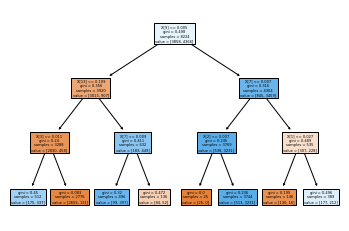

In [6]:
_ = tree.plot_tree(clf, filled=True)

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train,y_train)
scores=cross_val_score(gnb,x_test,y_test)
scores.mean()


0.7257045331065599

In [13]:
from sklearn.model_selection import train_test_split
#x为数据集的feature熟悉，y为label.
x_train, x_test, y_train, y_test = train_test_split(shotsetlist, label, test_size = 0.2,random_state=4)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from d2l import torch as d2l

# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.5

# Linear regression model
model = nn.Sequential(nn.Flatten(), nn.Linear(26,2))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

model.apply(init_weights)

# Loss and optimizer
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

from torch.utils.data import DataLoader

# Train the model
# d2l.train_ch3(model, x_train, y_train, loss, num_epochs, trainer)
from torch.utils.data import DataLoader
from torch.utils import data
class CustomDataset(data.Dataset):#需要继承data.Dataset
    def __init__(self,x,y):
        # TODO
        # 1. Initialize file path or list of file names.
        self.X=x 
        self.y=y
        self.length=len(self.X)
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        #这里需要注意的是，第一步：read one data，是一个data
        return self.X[index],self.y[index]
        
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return self.length

# mydataset=CustomDataset(x_train,y_train)
# myloader=data.DataLoader(mydataset,batch_size=15)
# for X, y in myloader:
#     print(X)
# d2l.train_ch3(model, myloader, myloader, loss, num_epochs, trainer)


In [23]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from d2l import torch as d2l
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.5

# Linear regression model
model = nn.Sequential(nn.Linear(28,40),nn.Linear(40,16),nn.ReLU(),nn.Linear(16,2))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

model.apply(init_weights)

# Loss and optimizer
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
scheduler = torch.optim.lr_scheduler.StepLR(trainer,step_size=5,gamma = 0.8)
from torch.utils.data import DataLoader

# Train the model
# d2l.train_ch3(model, x_train, y_train, loss, num_epochs, trainer)
from torch.utils.data import DataLoader
from torch.utils import data
class CustomDataset(data.Dataset):#需要继承data.Dataset
    def __init__(self,x,y):
        # TODO
        # 1. Initialize file path or list of file names.
        self.X=x 
        self.y=y
        self.length=len(self.X)
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        #这里需要注意的是，第一步：read one data，是一个data
        return self.X[index],self.y[index]
        
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return self.length

In [11]:
import numpy as np
import pyfastx
import phanotate_modules.functions as phano
shotsetds=[]
shotsetss=[]

fa_ds = pyfastx.Fasta('ds-linear.fasta')
fa_ss = pyfastx.Fasta('ss-circular.fasta')
def shot(str):
    length=len(str)
    start=np.random.randint(0,length,10)
    shot_len=np.random.normal(3000,200,1)
    return [str[s:int(s+shot_len)] for s in start]

for itm in fa_ds:
    for _ in range(1):
        shotsetds=shotsetds+shot(itm.seq)
for itm in fa_ss:
    for _ in range(1):
        shotsetss=shotsetss+shot(itm.seq)
shotsetds=[phano.get_backgroud_rbs(i) for i in shotsetds]
# shotsetds = torch.Tensor(shotsetds)
# shotsetds = torch.Tensor.reshape(shotsetds,(-1,28))
shotsetss=[phano.get_backgroud_rbs(i) for i in shotsetss]
# shotsetss = torch.Tensor(shotsetss)
# shotsetss = torch.Tensor.reshape(shotsetss,(-1,28))
shotsetlist=shotsetds+shotsetss
shotsetlist=np.array(shotsetlist,dtype=np.float32)
labels1=np.ones(len(shotsetds))
labels2=np.zeros(len(shotsetss))
label=[labels1,labels2]
label=np.r_[labels1,labels2]
label=np.array(label,dtype=np.int)



In [10]:
a=fa_ds[1]
a.end

0

AssertionError: 0.5919559034392063

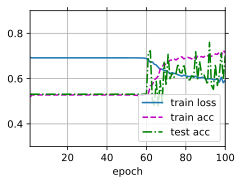

In [24]:
from sklearn.model_selection import train_test_split
#x为数据集的feature熟悉，y为label.
x_train, x_test, y_train, y_test = train_test_split(shotsetlist, label, test_size = 0.2,random_state=4)
shotset=CustomDataset(torch.Tensor(x_train),y_train)
myloader=data.DataLoader(shotset,batch_size=128)
testset=CustomDataset(torch.Tensor(x_test),y_test)
testloader=data.DataLoader(shotset,batch_size=128 )

d2l.train_ch3(model,myloader, testloader, loss, num_epochs, trainer)

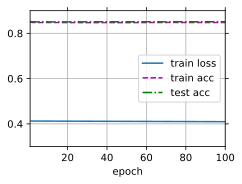

In [28]:
trainer = torch.optim.SGD(model.parameters(), lr=0.001)
d2l.train_ch3(model,myloader, testloader, loss, 100, trainer)